Grove's source code has been modified to work for the directed graph in this example. The relevant changes can be found in `grove/grove/pyqaoa/maxcut_qaoa.py` in lines 59-62.

In [194]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from pyquil.api import WavefunctionSimulator
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize 
from pyquil.api import get_qc

{(0, 3): Text(-0.0633687,-0.777806,'0.8'),
 (0, 4): Text(0.431375,-0.633418,'1.2'),
 (3, 5): Text(-0.599585,-0.0959234,'0.1'),
 (4, 6): Text(0.613474,0.000639022,'0.3'),
 (5, 1): Text(-0.550105,0.777167,'0.4'),
 (1, 6): Text(0.16821,0.729342,'0.2')}

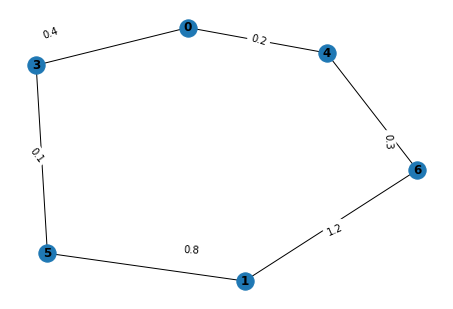

In [212]:
#Initialize a weighted undirected graph using networkx

G = nx.Graph()

G.add_edge(0, 3, weight=0.8)
G.add_edge(0, 4, weight=1.2)
G.add_edge(3, 5, weight=0.1)
G.add_edge(1, 5, weight=0.4)
G.add_edge(4, 6, weight=0.3)
G.add_edge(6, 1, weight=0.2)

pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')

nx.draw(G, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


In [228]:
## Checking edges and their corresponing weights
edges = list(G.edges)
weights = [*nx.get_edge_attributes(G, 'weight').values()]

for edge, weight in zip(edges,weights):
    print(edge[0],edge[1],weight)
#print(G.edges)
#print([*nx.get_edge_attributes(G, 'weight').values()])

0 3 0.8
0 4 1.2
3 5 0.1
4 6 0.3
5 1 0.4
1 6 0.2


In [229]:
p = 1 #steps or circuit depth. The greater the depth,the more the expectation value is close to the ground
#state energy of the hamiltonian
inst = maxcut_qaoa(G, steps=p, connection=get_qc(f"{len(G.nodes)}q-qvm", noisy=True)) #Noisy case
opt_betas, opt_gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [2.32425039 6.04379892] 
	E => 9.044028976068525
	Parameters: [2.56748589 5.69241526] 
	E => 8.480911307188226
	Parameters: [2.56748589 5.69241526] 
	E => 8.782742162252266
	Parameters: [2.86477373 5.762692  ] 
	E => 8.980935692021925
	Parameters: [2.8107214  5.34103161] 
	E => 8.71698853515595
	Parameters: [2.70261673 5.62213853] 
	E => 8.285494009167309
	Parameters: [2.70261673 5.62213853] 
	E => 8.295192912282369
	Parameters: [2.78369523 5.48158507] 
	E => 8.257645122828688
	Parameters: [2.78369523 5.48158507] 
	E => 8.282386589432258
	Parameters: [2.78369523 5.48158507] 
	E => 8.260775823600955
	Parameters: [2.78369523 5.48158507] 
	E => 8.25782661153211
	Parameters: [2.7321766  5.52111573] 
	E => 8.252490480697531
	Parameters: [2.73534373 5.50025233] 
	E => 8.251110422176048
	Parameters: [2.7587277  5.49613455] 
	E => 8.250584278769107
	Parameters: [2.75446527 5.48673229] 
	E => 8.250369516843335
	Parameters: [2.74597011

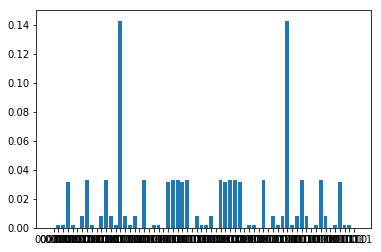

Optimal State: 001110


In [239]:
t = np.hstack((opt_betas, opt_gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = WavefunctionSimulator().wavefunction(prog)
wf = wf.amplitudes
states = []
probs = []
for state_index in range(inst.nstates):
    states.append(inst.states[state_index])
    probs.append(np.conj(wf[state_index]) * wf[state_index])
#probs = wf.probabilities()
plt.bar(states,probs)
plt.show()
print("Optimal State:",inst.states[np.argmax(probs)])

# Observations

* We already see the two peaks with circuit depth 1, which gives us reasonable confidence that if we increase the circuit depth, i.e the value of `step` variable or play around with `minimizer_kwargs` to try different solvers, we will get two very sharp pointed peaks.  
* Since the graph is cyclic, we would expect the optimal state to be symmetric as can be seen in the graph as well. As we that one state is 001110, the other state is going to be 110001


In [232]:
A = nx.to_numpy_matrix(G)
eigv = np.linalg.eigvals(A)

print("Ground State Energy:",min(eigv))

Ground State Energy: -1.4658437625811247


In [233]:
##Noiseless case
p = 1 #steps or circuit depth. The greater the depth,the more the expectation value is close to the ground
#state energy of the hamiltonian
inst = maxcut_qaoa(G, steps=p, connection=get_qc(f"{len(G.nodes)}q-qvm", noisy=False)) #Noisy case
opt_betas, opt_gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [1.23416799 5.42297102] 
	E => 8.276955251442985
	Parameters: [1.23416799 5.42297102] 
	E => 8.296730860093396
	Parameters: [1.17676483 5.42297102] 
	E => 8.258391057189044
	Parameters: [1.19111562 5.54908663] 
	E => 8.254955285852057
	Parameters: [1.15882634 5.51755773] 
	E => 8.252811600859449
	Parameters: [1.1758679 5.4781466] 
	E => 8.250608348764137
	Parameters: [1.1758679 5.4781466] 
	E => 8.250996856699194
	Parameters: [1.18691128 5.49243313] 
	E => 8.250509046325702
	Parameters: [1.18031048 5.50437963] 
	E => 8.250094578066323
	Parameters: [1.18031048 5.50437963] 
	E => 8.250151851595092
	Parameters: [1.17658176 5.49827552] 
	E => 8.25001413786035


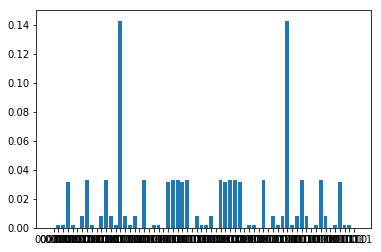

In [234]:
t = np.hstack((opt_betas, opt_gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = WavefunctionSimulator().wavefunction(prog)
wf = wf.amplitudes
states = []
probs = []
for state_index in range(inst.nstates):
    states.append(inst.states[state_index])
    probs.append(np.conj(wf[state_index]) * wf[state_index])
#probs = wf.probabilities()
plt.bar(states,probs)
plt.show()
print("Optimal State:",inst.states[np.argmax(probs)])

# Observations (Noiseless Case)
* We see that there is no noticeable decrease in performance. $E_{noisy}=8.250170959778643$, whereas $E_{noiseless}=8.25001413786035$. Noisless expectation is _slightly_ better on 4th decimal place, implying that VQE is robust to noise
* Finally note that the ground state energy of this hamiltonian would is $-1.4658437625811247$, which is to say that if were to run this for an infinite time, the expectations would converge to this value. However, our expecation value in just one circuit step is close enough to the ground state energy such that it can identify candidate optimal states